Additional Questions: 
---
- How does the simple linear regression model results (using sqft_living) compare to the multiple regression we ran in the tutorial.
     * Using only one feature increases the margin of error, and is not a good model. In other words sqft_living alone is no enough to predict the price of a house.


- Which model (which features) better capture the variation in y based on the variation in the feature(s)?  Justify your response based on output from your model(s).
    * The multiple regression model better captures the variation in price based on the variation in the features (sqft_living, bedrooms and yr_built). This is evident from the higher R-squared value, which shows that including additional features improves the model's ability to explain the variability in the dependent variable.

- What is linear regression (for non data science audience)?:

    * linear regression is statistical way ro create a mathematical formula to model a relationship between a depended variable to a independent variable (or many independent variables) and predict the result of the dependent variable by entering the independent variables. For example, in this exercise we are working with only one independent variable to create a model that can predict the price of a house. In this model you could enter the square feet of a house and get a price prediction

- What it means to train_test_split and how we arrive to the result?

    * Train split means that the data is divided into two parts, one for training the linear regression model and another for testing the model. In this case we are using 80% of the data to train the model and 20% to test the model.

- What does r-squared means?

    * Measures the proportion of the variance in the dependent variable that is predictable from the independent variables.
    * Higher r-squared indicates a better fit of the model to the data.

- What does Mean Squared Error (MSE) means?

    * Is the average of the squared difference between the predicted values and the actual values.
    * Lower MSE indicate better model performance

- Mean Absolute Error (MAE)
    * Average of the absolute differences between predicted values and the actual values.
    * Lower MAE indicates better model performance

- Root Mean Squared Error (RMSE)
    * RMSE is the square root of the average of the squared differences between the predicted values ans the actual values.
    * Lower RMSE values indicate better model performance.


In [11]:
import pandas as pd
kc_house_data_df = pd.read_csv(r'kc_house_data.csv', parse_dates=["date"])
kc_house_data_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [12]:
kc_house_data_df.describe()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,2014-10-29 04:38:01.959931648,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
min,1.000102e+06,2014-05-02 00:00:00,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,2014-07-22 00:00:00,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,2014-10-16 00:00:00,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,2015-02-17 00:00:00,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,2015-05-27 00:00:00,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631


In [13]:
kc_house_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

# Visualizations

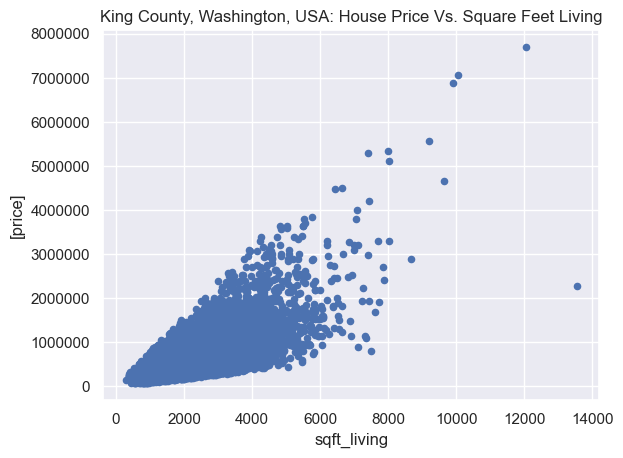

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots()
kc_house_data_df.plot(x="sqft_living", y=["price",], kind='scatter', ax=ax)
ax.set_title("King County, Washington, USA: House Price Vs. Square Feet Living", wrap=True)
plt.ticklabel_format(axis="y", style="plain")

In [15]:
X = kc_house_data_df[["sqft_living"]]
y = kc_house_data_df["price"]

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Split the data for the train and test
X_train, X_test, y_train,y_test = train_test_split(X,y,train_size=0.8, random_state=0)

In [17]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [18]:
y_pred = lr.predict(X_test)

In [19]:
print("Intercept of the model:", lr.intercept_)
print("Coefficient fo the line:", lr.coef_)

Intercept of the model: -48257.063591027516
Coefficient fo the line: [283.96855716]


In [20]:
X_test["sqft_living"].to_numpy()[:int(len(y_test))]

array([1430, 4670, 1440, ..., 1360,  950, 1640])

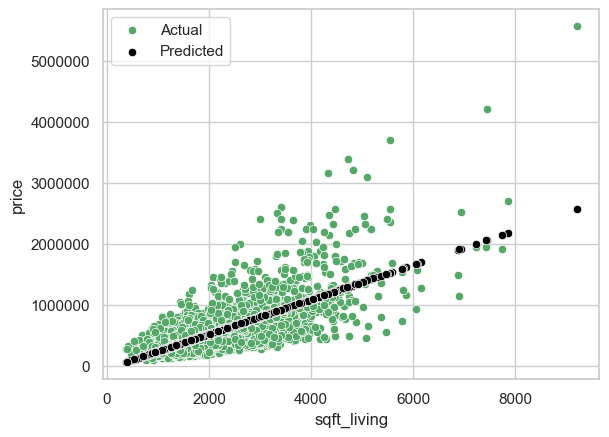

In [42]:
import seaborn as sns
fig, ax = plt.subplots()
sns.scatterplot(x=X_test['sqft_living'], y=y_test, ax=ax, label="Actual",color="g" )
sns.scatterplot(x=X_test['sqft_living'], y=y_pred, ax=ax, label="Predicted",color="black")
plt.ticklabel_format(axis="y", style="plain")

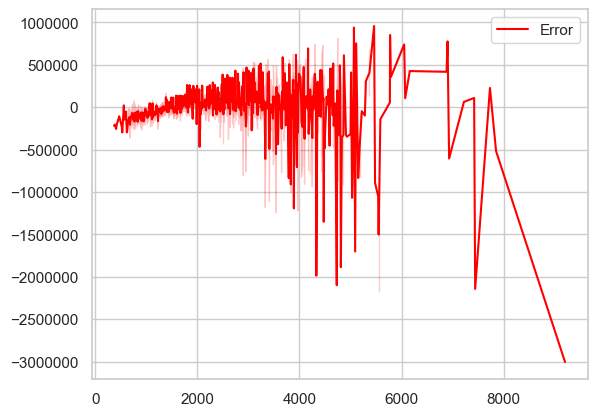

In [41]:
fig, ax = plt.subplots()
error = [y_pred[i] - (y_test.to_numpy())[i] for i in range(len(y_test))]
sns.lineplot(x=X_test['sqft_living'].to_numpy(), y=error,ax=ax, label="Error", color="red")
plt.ticklabel_format(axis="y", style="plain")

In [23]:
import numpy as np
from sklearn import metrics
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error", metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Mean Squared Error", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 170780.92628145573
Mean Squared Error 61940787124.62474
Root Mean Mean Squared Error 248879.06124185043


In [24]:
print('r square:',metrics.r2_score(y_test,y_pred))

r square: 0.47915772372653753


In [25]:
features = pd.DataFrame(lr.coef_, X.columns, columns=["coefficient"])
features

,coefficient
sqft_living,283.968557


In [26]:
features.coefficient = features.coefficient.abs()
features

,coefficient
sqft_living,283.968557



# Transforming the units of coefficients

In [27]:

stdevs = [ ]
for i in X.columns:
    stdevs.append(kc_house_data_df[i].std())
features["stdev"] = np.array(stdevs).reshape(-1,1)
features["importance"] = features["coefficient"] * features["stdev"]
features

,coefficient,stdev,importance
sqft_living,283.968557,918.440897,260808.336367


In [28]:
features["importance_normalize"] = (features["importance"] / features["importance"].max())*100
features

,coefficient,stdev,importance,importance_normalize
sqft_living,283.968557,918.440897,260808.336367,100.0
